## Backtesting Candlestick Patterns in Python - Hammer & Hanging Man

Reference: https://greyhoundanalytics.com/blog/backtesting-candlestick-patterns-in-python/

In [2]:
import vectorbt as vbt
from datetime import datetime, timedelta
import talib
from IPython import display
import plotly.graph_objects as go

In [3]:
end_time = datetime.now()
start_time = end_time - timedelta(days = 5)

In [4]:
data = vbt.YFData.download("BTC-USD", interval="1h", 
                           start=start_time,
                           end=end_time).get()
print(data)

                                   Open          High           Low  \
Datetime                                                              
2023-08-05 13:00:00+00:00  28979.976562  29002.355469  28967.134766   
2023-08-05 14:00:00+00:00  28995.302734  29052.082031  28995.302734   
2023-08-05 15:00:00+00:00  29042.082031  29049.677734  28980.849609   
2023-08-05 16:00:00+00:00  29003.632812  29014.988281  28978.740234   
2023-08-05 17:00:00+00:00  28998.210938  29033.658203  28996.255859   
...                                 ...           ...           ...   
2023-08-10 09:00:00+00:00  29486.970703  29513.001953  29453.748047   
2023-08-10 10:00:00+00:00  29502.617188  29527.562500  29486.218750   
2023-08-10 11:00:00+00:00  29519.910156  29523.742188  29462.466797   
2023-08-10 12:00:00+00:00  29473.035156  29587.851562  29462.083984   
2023-08-10 13:00:00+00:00  29534.505859  29534.505859  29505.992188   

                                  Close     Volume  Dividends  Stock Splits 

In [5]:
hammer = talib.CDLHAMMER(data.Open, data.High, data.Low, data.Close)
hammer[hammer == 100] # fiter out when hammer pattern occur

Datetime
2023-08-06 00:00:00+00:00    100
2023-08-06 10:00:00+00:00    100
2023-08-09 06:00:00+00:00    100
dtype: int32

In [6]:
hanging_man = talib.CDLHANGINGMAN(data.Open, data.High, 
                                  data.Low, data.Close)
hanging_man[hanging_man == -100] # filter out when hanging man pattern occur

Datetime
2023-08-09 08:00:00+00:00   -100
Freq: H, dtype: int32

In [7]:
buys = hammer == 100
sells = hanging_man == -100

pf = vbt.Portfolio.from_signals(data.Close, buys, sells, 
                                fees=0.005, init_cash=1000,
                                size_type="value")
pf.stats()

Start                         2023-08-05 13:00:00+00:00
End                           2023-08-10 13:00:00+00:00
Period                                  5 days 01:00:00
Start Value                                      1000.0
End Value                                   1016.808349
Total Return [%]                               1.680835
Benchmark Return [%]                           1.789704
Max Gross Exposure [%]                            100.0
Total Fees Paid                               10.084714
Max Drawdown [%]                               1.244117
Max Drawdown Duration                   1 days 23:00:00
Total Trades                                          1
Total Closed Trades                                   1
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                      100.0
Best Trade [%]                                 1.689239
Worst Trade [%]                                1

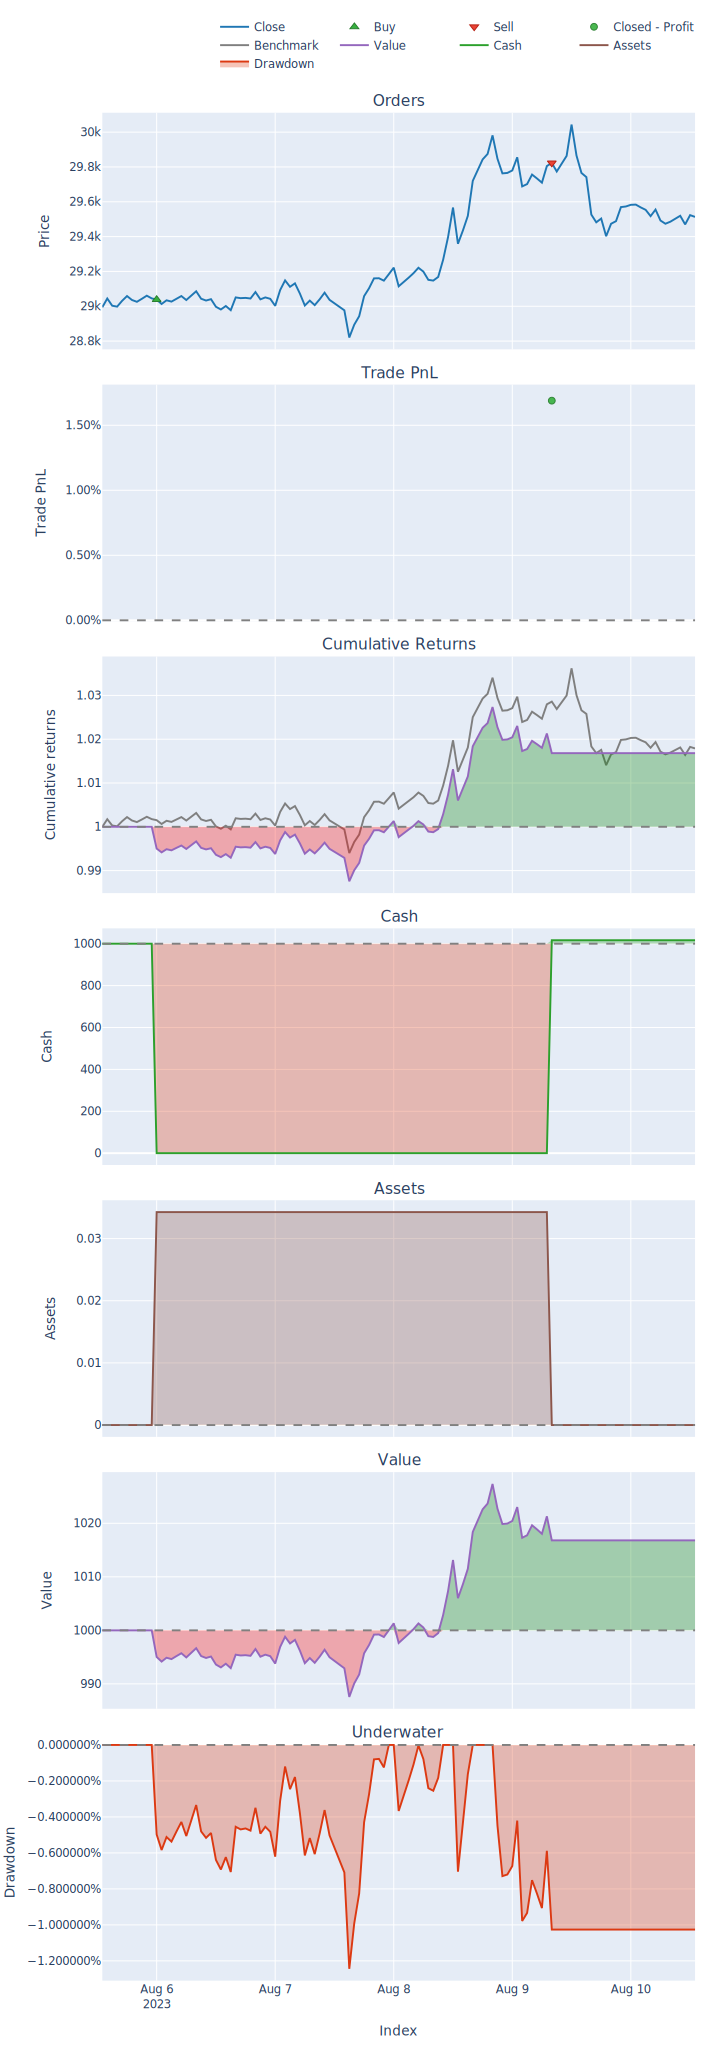

In [8]:
pf.plot(subplots=["orders","trade_pnl",
                  "cum_returns","cash",
                  "assets","value","underwater"]).show_svg()
# remove show_svg() with show() to display interactive chart!

In [9]:
trade_records = pf.trades.records_readable
trade_records

,Exit Trade Id,Column,Size,Entry Timestamp,Avg Entry Price,Entry Fees,Exit Timestamp,Avg Exit Price,Exit Fees,PnL,Return,Direction,Status,Position Id
0,0,0,0.034266,2023-08-06 00:00:00+00:00,29038.246094,4.975124,2023-08-09 08:00:00+00:00,29823.078125,5.10959,16.808349,0.016892,Long,Closed,0
